In [ ]:
# Import essential libraries (keras , numpy)
import keras
from tensorflow.keras import layers

import numpy as np

In [ ]:
# encoding dimension
en_dimension = 32

inp_image = keras.Input(shape = (784,))

# encoding layers (3)
encoded = layers.Dense(784,activation = 'relu')(inp_image)

encoded1 = layers.Dense(256 , activation = 'relu' )(encoded)

encoded2 = layers.Dense(en_dimension , activation = 'relu' )(encoded1)

# decoding layers (3)
decoded1 = layers.Dense(256, activation = 'relu')(encoded2)

decoded = layers.Dense(784, activation = 'sigmoid')(decoded1)

In [ ]:
# autoencoder model
# imp_image --> inpt layer , decoded--> out layer
autoencoder = keras.Model(inp_image, decoded)

In [ ]:
# Creating encoder part
encoder = keras.Model(inp_image,encoded2) # parameters are 1- encoder's input      2- encoder's output

In [ ]:
# Creating decoder
# implementing decoder

 # implement imput layer for decoder
decoder_input = keras.Input(shape = (en_dimension,))

 # decoder_layer_1
decoder_layer_1 = autoencoder.layers[-2](decoder_input) # its input is decoder input

 #decoder layer
decoder_layer = autoencoder.layers[-1](decoder_layer_1) # input of layer is deocder layer 1

# decoder model its (input , output )
decoder = keras.Model(decoder_input , decoder_layer)

In [ ]:
# import datasets to use mnist
from keras.datasets import mnist

# determine train and test data
(x_train , _), (x_test , _) = mnist.load_data()

# convert x_train range from 0:255  to  0:1
x_train = x_train.astype('float32')/256

x_test = x_test.astype('float32')/256

In [ ]:
# reshape x_train and y_train from matrices to victors

# x_train(no_of_imaegs , length , width , no_of_channel)
x_train = x_train.reshape(len(x_train),np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test),np.prod(x_test.shape[1:]))

In [ ]:
# display shapes after reshape

print(x_train)
print(x_test)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# model training

autoencoder.compile(optimizer = 'adam' , loss = 'binary_crossentropy')

autoencoder.fit(x_train,x_train,
                epochs = 2,
                batch_size = 8,
                shuffle = True,
                validation_data = (x_test, x_test)
                )

Epoch 1/2
7500/7500 [==============================] - 114s 15ms/step - loss: 0.0888 - val_loss: 0.0875
Epoch 2/2
7500/7500 [==============================] - 119s 16ms/step - loss: 0.0871 - val_loss: 0.0860


In [ ]:
# model prediction

# extract encoded images
encoded_imgs = encoder.predict(x_test) # input is x_test

# extract decoded images
decoded_img = decoder.predict(encoded_imgs) # imput is from encoded_img

313/313 [==============================] - 1s 2ms/step


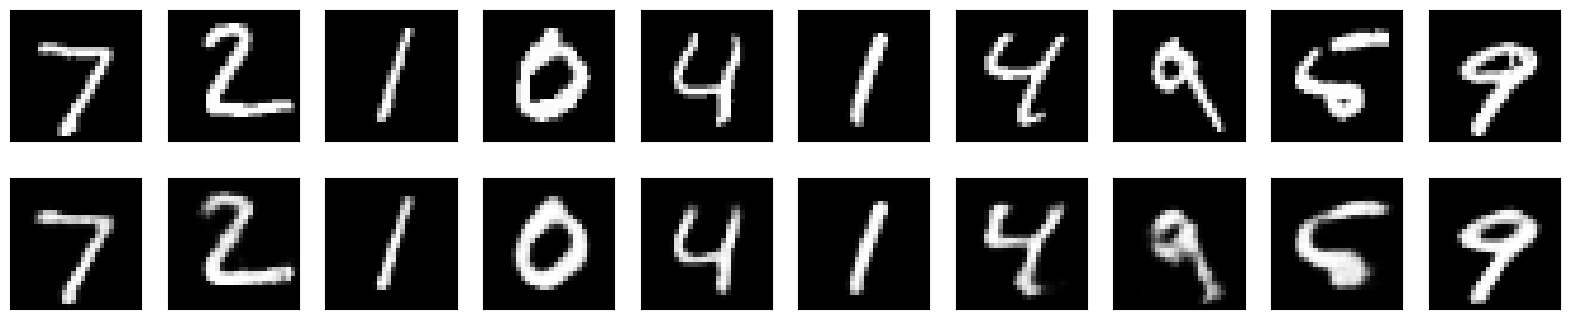

In [ ]:
# visualizing data

import matplotlib.pyplot as plt

n = 10
plt.figure(figsize = (20,4))
# Creating subplot(first row --> original image , second row --> decompressed image)
for i in range(n):
  # first row --> original image
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray() # convert image to gray image

  # hiding x_axis and y_axis from image
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # second row --> decompressed image
  ax = plt.subplot(2, n, i + 1+ n)
  plt.imshow(decoded_img[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)